In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

# <span style = "color:red">ch02 한글 형태소 분석</span>

# 1. 자연어처리

- 자연어 : 일상적인 언어
- 자연어 처리 분야 : 
    * 자연어 이해 : 형태소분석 → postagging → 의미분석, 시각화
    * 자연어 생성 : RNN, LSTM, GRU, ... , encoder-decoder 알고리즘 → 트랜스포머알고리즘
- 활용분야 : 트랜드분석, 탐색적 분석, 맞춤법검사, 번역기, 쳇봇

# 2. 자연어 이해 처리 절차

- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙 확인
- 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, GRU, ...

# 3. 한글형태소 분석 엔진(Konlpy,...)

- 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사 태그)
- Konlpy (pip install konlpy : jpype1 라이브러를 의존)
    - HanNanum : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    - Kkma : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    - Komoran : 자바로 만든 형태소 분석기(JAVA_HOME 시스템환경변수, Path설정)
    - Okt
- Mecab (pip install python-mecab-ko)
    - MeCab : C++로 만든 형태소 분석기. 저사양환경에서 사용 가능. 다국어 바인딩 지원

In [2]:
import os

os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [3]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로
많이 사용되는 언어입니다
'''

## 3.1 HanNanum

In [4]:
from konlpy.tag import Hannanum

hannanum = Hannanum(jvmpath = None,
                   max_heap_size = 1024)  # 기본값:1024
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

- 구글에서 konlpy docs 검색후 https://konlpy.org/
- api 메뉴 → "Comparison between POS tagging classes"클릭 → Korean POS tags comparison chart클릭

In [5]:
# 형태소 분석 : morphs

print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [6]:
# 명사만 추출

print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [7]:
# 품사태그

print(hannanum.pos(text))  # 품사 개수 기본값 ntags = 9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [8]:
print(hannanum.pos(text, ntags = 22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [9]:
# 퀴즈 1. text에서 형용사(PA)만 추출

tagged_text = hannanum.pos(text, ntags = 22)
words = [token for token, tag in tagged_text if tag == 'PA']
# for token, tag in tagged_text :
#     if tag == 'PA' :
#         word.append(token)
words

['아름답', '많']

In [10]:
# 퀴즈 2 : text에서 명사(NC, NQ, NB, NN, NP)만 추출
print([token for token, tag in tagged_text if tag.find('N') != -1 ])
print([token for token, tag in tagged_text if (tag == 'NC') |
                                              (tag == 'NQ') |
                                              (tag == 'NB') |
                                              (tag == 'NN') |
                                              (tag == 'NP')])
print([(token, tag) for token, tag in tagged_text \
               if tag in ('NC', 'NQ', 'NB', 'NN', 'NP')])
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
[('복잡', 'NC'), ('한국어', 'NC'), ('전세계', 'NC'), ('13', 'NN'), ('번', 'NB'), ('사용', 'NC'), ('언어', 'NC')]
['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [11]:
# 퀴즈 3 : text에서 보통명사(NC)만 추출
[token for token, tag in tagged_text if tag == 'NC']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.2 Kkma

In [13]:
from konlpy.tag import Kkma

kkma = Kkma(jvmpath = None,
            max_heap_size = 1024)  # "4m", "4g"

# 형태소 분석
print(kkma.morphs(text)) 

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [14]:
# 명사추출

print(kkma.nouns(text)) 

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [16]:
# 품사 태깅

print(kkma.pos(text))  # ntags 지정 불가 (무조건 56으로)

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [17]:
# 명사 추출

tagged_text = kkma.pos(text)
print([word for word, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB', 'NNM')])
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '번째', '사용', '언어']
['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [18]:
# 보통명사(NNG) + 고유명사(NNP)

print([word for word, tag in tagged_text if tag in ('NNG', 'NNP')])

['복잡', '한국어', '전세계', '사용', '언어']


## 3.3 Komoran

In [19]:
from konlpy.tag import Komoran

komoran = Komoran()  # max_heap_size = 1024

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [20]:
# 형태소 분석

print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [21]:
# 명사 추출

print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [22]:
# 품사 태깅

print(komoran.pos(text))  # ntags 조정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [23]:
# 일반명사(NNG), 고유명사(NNP)만 추출

[token for token, tag in komoran.pos(text) if tag in ('NNG', 'NNP')]

['한국어', '전', '세계', '사용', '언어']

## 3.4 Twitter (Okt : Open Korean Text)

- konlpy v0.4.5부터 Twitter → Okt로 바뀜

In [24]:
import konlpy

konlpy.__version__

'0.6.0'

In [25]:
%%time

from konlpy.tag import Twitter, Okt

# okt = Twitter()
okt = Okt()  # max_heap_size
print('구 추출 :', okt.phrases(text))
print('형태소 추출 :', okt.morphs(text))
print('명사 추출 :', okt.nouns(text))
tagged_text = okt.pos(text)
print('품사 태깅을 이용한 명사 추출 :',
     [token for token, tag in tagged_text if tag == 'Noun']
     )
print('품사 태깅 :', tagged_text)

구 추출 : ['다소', '한국어', '전세계', '13번째', '사용', '사용되는 언어', '13', '번째', '언어']
형태소 추출 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '\n', '많이', '사용', '되는', '언어', '입니다', '\n']
명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('\n', 'Foreign'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective'), ('\n', 'Foreign')]
CPU times: total: 14 s
Wall time: 2.92 s


## 3.5 MeCab

- pip install python-mecab-ko

In [26]:
%%time

from mecab import MeCab

mecab = MeCab()  # 힙메모리 사이즈 지정이 안 됨
print('형태소 추출 :', mecab.morphs(text))
print('명사 추출 :', mecab.nouns(text))
tagged_text = mecab.pos(text)  # ntags 조정 불가 (ntags = 43 고정)
print('품사 태깅을 이용한 명사 추출 :',
    [token for token, tag in tagged_text \
     if tag in ('NNG', 'NNP', 'NNB', 'NNBC', 'NR', 'NP')]
     )
print('품사태깅 :', tagged_text)

형태소 추출 : ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다']
명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사태깅 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]
CPU times: total: 0 ns
Wall time: 85.5 ms


# 4. 말뭉치

In [27]:
# 영어 말뭉치

import nltk

emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [28]:
%pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [29]:
# 한글 말뭉치

from konlpy.corpus import kolaw

# data = kolaw.open('constitution.txt').readlines()  # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 :', len(data))
print('%r' % data[:100])

글자수 : 18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5. 워드 클라우드

- pip install wordcloud

In [31]:
l = ['aaa', 'bbb', 'ccc', 'aaa']
' '.join(l)

'aaa bbb ccc aaa'

In [32]:
# 말뭉치에서 단어추출(특수 문자 제외)

from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag

ret = RegexpTokenizer('[\w]{2,}')
words = ret.tokenize(emma)

# 명사(고유명사제외)만 추출
emma_tags = pos_tag(words)
noun_list = [token for token, tag in emma_tags if tag in ('NN', 'NNS')]
print('추출된 명사 개수 :',len(noun_list), '\t단어 종류수 :',len(set(noun_list)))
print('noun_list :', noun_list[:10])
emma_noun = ' '.join(noun_list)
print('워드 클라우드에 필요한 내용 :', emma_noun[:100])

추출된 명사 갯수 : 22362 	단어 종류수 : 3498
noun_list : ['Emma', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'indulgent']
워드 클라우드에 필요한 내용 : Emma clever home disposition blessings existence years world daughters indulgent father consequence 


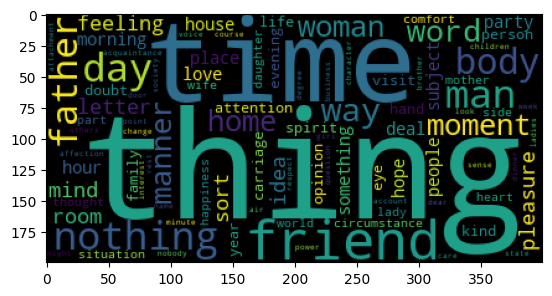

In [33]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

- 컬러맵
    - https://matplotlib.org/stable/users/explain/colors/colormaps.html

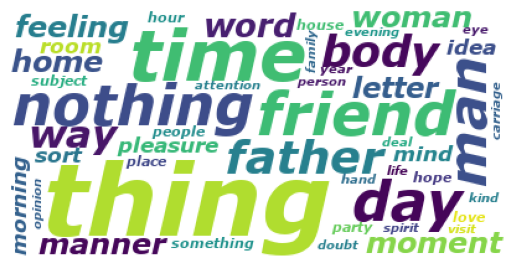

In [36]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/Verdana/verdanaz.ttf',
                    # width = 800,  # 생성될 이미지 가로(픽셀)
                    background_color = 'white',  # 배경색
                    max_words = 300,  # 표시될 단어의 최대 개수
                    relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                    colormap = 'viridis',  # 글씨 컬러맵
                    max_font_size = 80,  # 최대 폰트 사이즈
                    min_font_size = 10  #최소 사이즈
)
wordcloud.generate(emma_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [37]:
# 한글 말뭉치 data로 워드클라우드 시각화

from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab

analyzer = MeCab()
noun_list = analyzer.nouns(data)
noun_list = [word for word, tag in analyzer.pos(data) \
              if tag in ('NNG', 'NNP')]
data_noun = ' '.join(noun_list)
data_noun[:100]

'대한민국 헌법 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입각 정의 인도 동포 애 민족 단결 사회 폐습 불의 타'

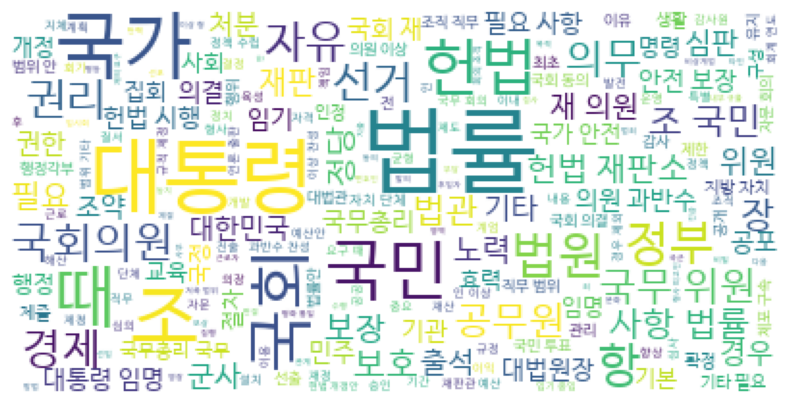

In [38]:
wordcloud = WordCloud(
                font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white', # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [39]:
# 불용어 처리 (불용어지정 + 불용어사전)

from wordcloud import STOPWORDS

불용어 = STOPWORDS | {'대통령', '법률'}  # | : 집합합연산자
불용어 = set(['대통령','법률'])
불용어 = {'대통령','법률','조'}
불용어

{'대통령', '법률', '조'}

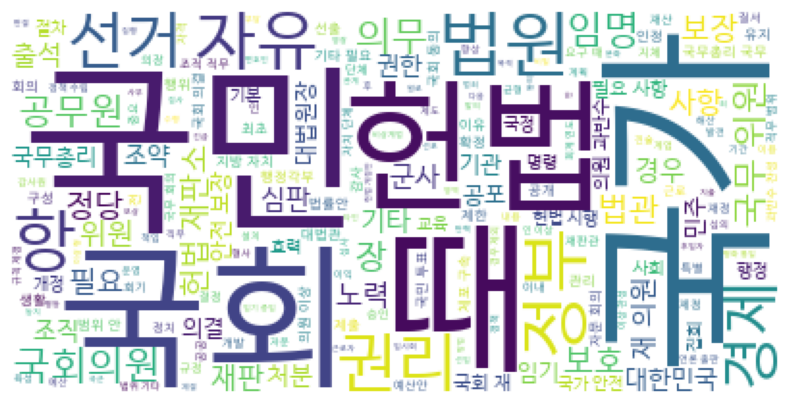

In [40]:
wordcloud = WordCloud(
                font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white',  # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3,
                stopwords = 불용어
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(468, 720, 3)

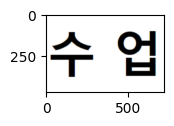

In [41]:
# 마스킹 : 워드클라우드를 지정된 마스크 이미지에 맞도록 설정
# 이미지를 넘파이 배열로 방법 1

from PIL import Image
import numpy as np

img = Image.open('data/test.png')
mask = np.array(img)
plt.figure(figsize = (2, 1))
plt.imshow(mask)
mask.shape

(468, 720, 3)

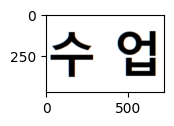

In [42]:
# 이미지를 넘파이 배열로 방법2

import cv2
# %pip install opencv-contrib-python

mask = cv2.imread('data/test.png',
                 # cv2.IMREAD_GRAYSCALE
                 )
plt.figure(figsize = (2, 1))
plt.imshow(mask)
mask.shape

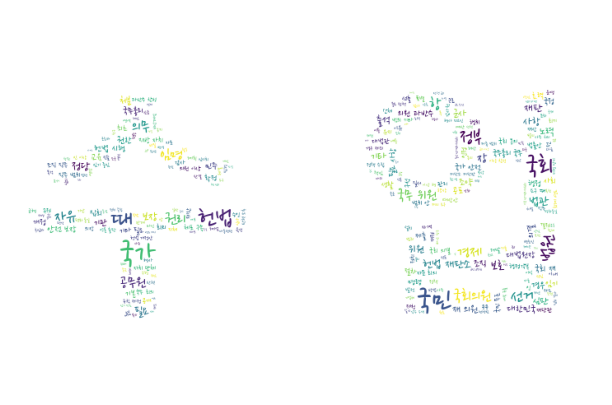

In [43]:
wordcloud = WordCloud(
                # font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path = 'data/NanumPenScript-Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white',  # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3,
                stopwords = 불용어,
                mask = mask
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

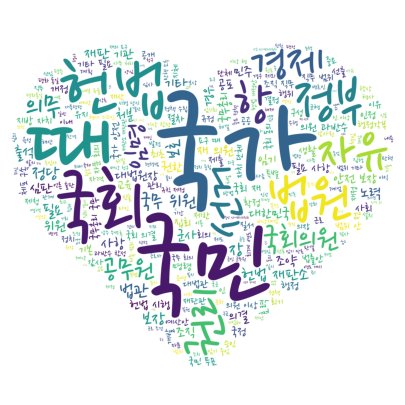

In [47]:
mask2 = cv2.imread('data/heart.jpg')
# plt.figure(figsize = (2, 2))
# plt.imshow(mask2)
mask2.shape

wordcloud = WordCloud(
                # font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path = 'data/NanumPenScript-Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white',  # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3,
                stopwords = 불용어,
                mask = mask2
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

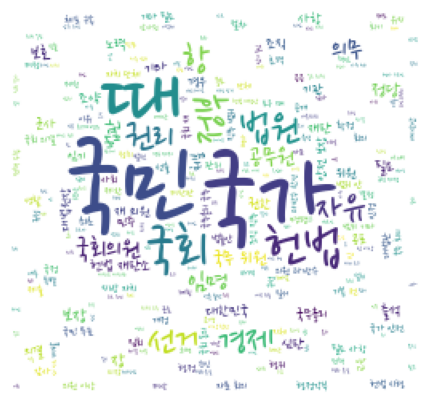

In [48]:
mask3 = cv2.imread('data/test2.jpg')
mask3.shape

wordcloud = WordCloud(
                # font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path = 'data/NanumPenScript-Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white',  # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3,
                stopwords = 불용어,
                mask = mask3
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

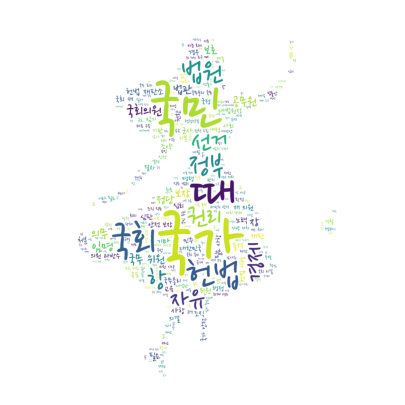

In [49]:
mask4 = cv2.imread('data/test3.png')
mask4.shape

wordcloud = WordCloud(
                # font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path = 'data/NanumPenScript-Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white',  # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3,
                stopwords = 불용어,
                mask = mask4
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(900, 900)


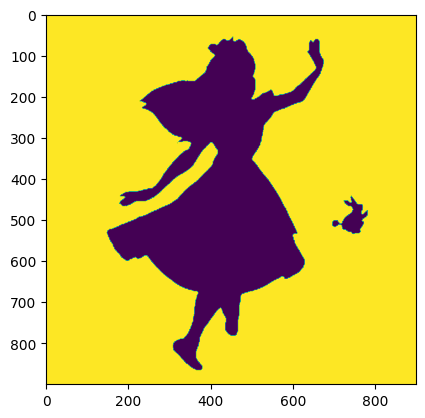

In [50]:
img = Image.open('data/test3.png')
mask5 = np.array(img)
print(mask5.shape)
plt.imshow(mask5)

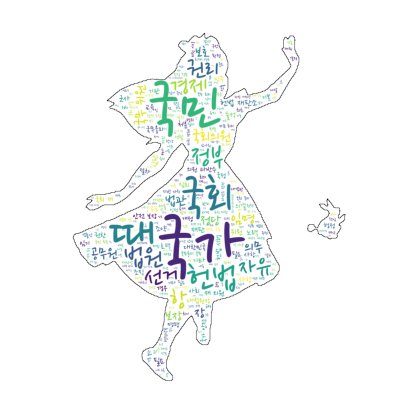

In [52]:
wordcloud = WordCloud(
                # font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path = 'data/NanumPenScript-Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white',  # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3,
                stopwords = 불용어,
                mask = mask5,
                contour_color = 'black',
                contour_width = 1
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(1124, 720, 3)


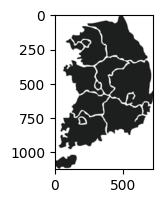

In [54]:
# convert('RGB') : 1채널이미지 → 3채널
# convert('RGBA') : 1채널이미지 → 4채널 (RGB + 투명도채널)
img = Image.open('data/south_korea.png').convert('RGB')
mask6 = np.array(img)
print(mask5.shape)
plt.figure(figsize = (2, 2))
plt.imshow(mask5)

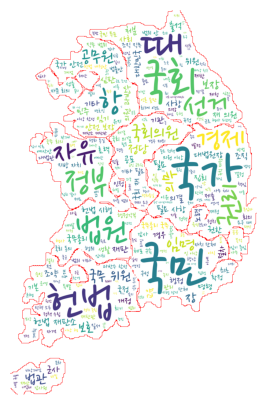

In [55]:
wordcloud = WordCloud(
                # font_path = 'C:/Windows/Fonts/한컴 고딕/Hancom Gothic Regular.ttf',
                font_path = 'data/NanumPenScript-Regular.ttf',
                # width = 800,  # 생성될 이미지 가로(픽셀)
                background_color = 'white',  # 배경색
                max_words = 300,  # 표시될 단어의 최대 개수
                # relative_scaling = 0.9,  # 단어 빈도에 따른 크기 차이 조정
                colormap = 'viridis',  # 글씨 컬러맵
                # random_state = 3,
                stopwords = 불용어,
                mask = mask6,
                contour_color = 'red',
                contour_width = 1
)
wordcloud.generate(data_noun)
plt.figure(figsize = (18, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [56]:
# 생성된 wordcloud 저장

wordcloud.to_file('korea.jpg')  # jpg나 png

# 6. 단어의 빈도수 시각화 (nltk.Text)

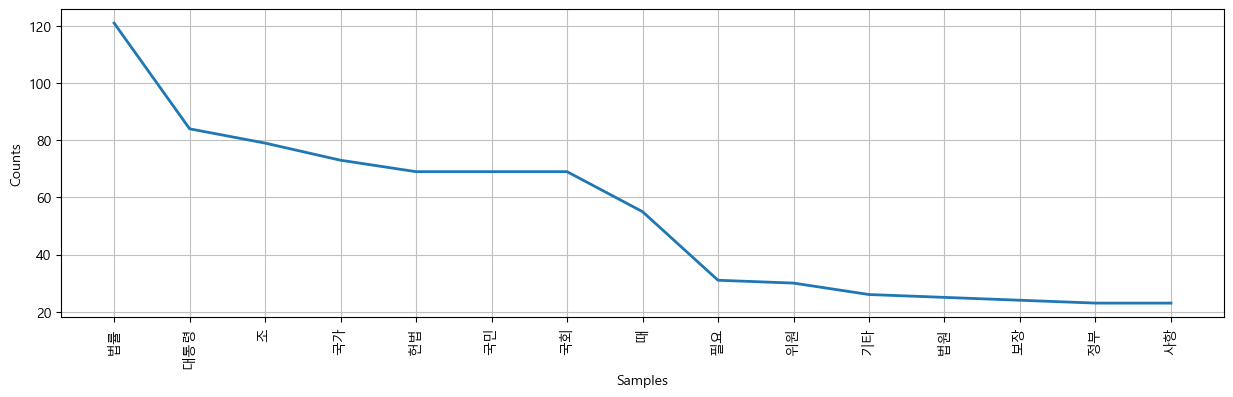

In [57]:
import nltk

data_text = nltk.Text(noun_list)
plt.figure(figsize = (15, 4))
plt.rc('font', family = 'Malgun Gothic')
data_text.plot(15)
plt.show()

In [58]:
data_text.vocab().most_common(15)

[('법률', 121),
 ('대통령', 84),
 ('조', 79),
 ('국가', 73),
 ('헌법', 69),
 ('국민', 69),
 ('국회', 69),
 ('때', 55),
 ('필요', 31),
 ('위원', 30),
 ('기타', 26),
 ('법원', 25),
 ('보장', 24),
 ('정부', 23),
 ('사항', 23)]

('법률', '대통령', '조', '국가', '헌법', '국민', '국회', '때', '필요', '위원', '기타', '법원', '보장', '정부', '사항')
(121, 84, 79, 73, 69, 69, 69, 55, 31, 30, 26, 25, 24, 23, 23)


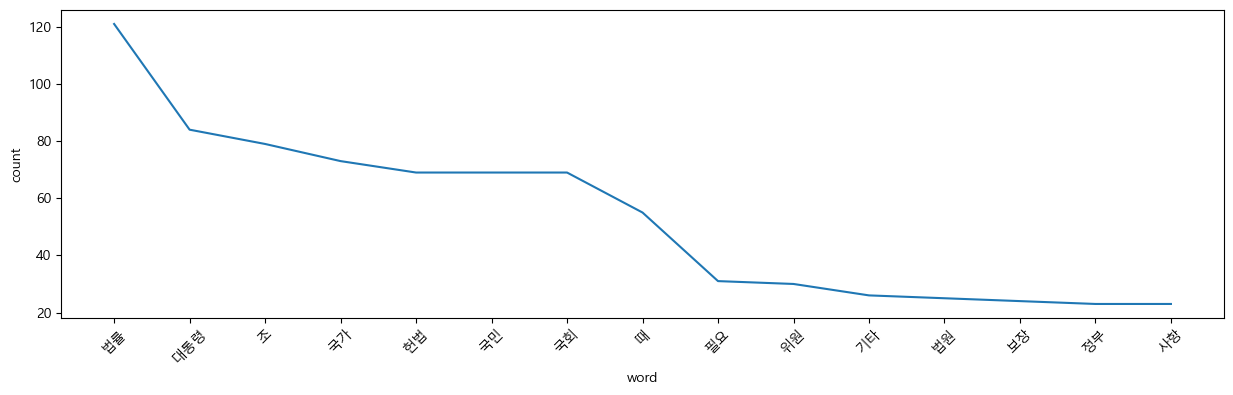

In [59]:
word, counts = zip(*data_text.vocab().most_common(15))
print(word)
print(counts)
plt.figure(figsize = (15, 4))
plt.plot(word, counts)
plt.xticks(rotation = 45)
plt.xlabel('word')
plt.ylabel('count')
plt.show()

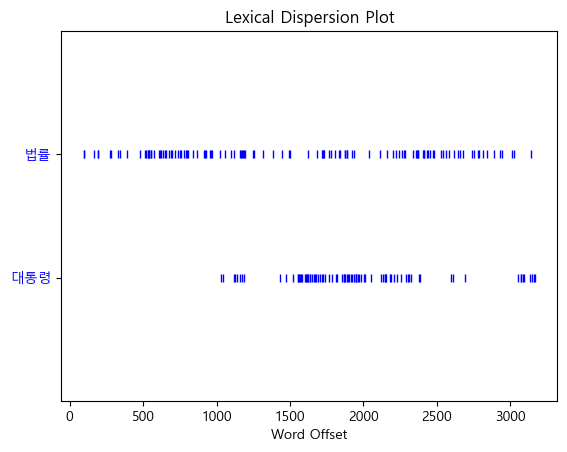

In [60]:
data_text.dispersion_plot(['법률', '대통령'])

# 7. 워드 임베딩

- 단어간 벡터 계산 → 단어간 유사성 도출

In [61]:
import requests
from bs4 import BeautifulSoup

rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, "xml")
link_el = soup.select('item link')
link_list = [el.text for el in link_el]
print(len(link_list))

20


In [62]:
'''각 link들의 뉴스 기사 -> 명사만 : 
  [['드촌', '재건축', '명사1', .....],
   ['캠핑장', '재건축', '명사2', ....], ...]  
'''

from konlpy.tag import Kkma

kkma = Kkma()
news = []
for link in link_list :
    response = requests.get(link)
    # print(response.status_code)
    news_soup = BeautifulSoup(response.content, "html.parser")
    title = news_soup.select_one('title').text
    description = str(news_soup.select_one('meta[name = "description"]'))
    noun_list = kkma.nouns(title + ' ' + description)
    불용어 = {'뉴스', '앵커'}
    noun_list = [word for word in noun_list if word not in 불용어]
    # print(noun_list)
    news.append(noun_list)

In [63]:
# rss의 title과 description → 명사 추출 → 워드임베딩 (단어간 거리 계산) → 특정 단어의 유사도

import requests
from bs4 import BeautifulSoup
from konlpy.tag import Kkma

kkma = Kkma()
rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, "xml")
news = []
item_elems = soup.find_all('item')
for item_elem in item_elems :
    title = item_elem.find('title').text
    description = item_elem.find('description').text
    # print(title + ' ' + description)
    article = title + ' ' + description.replace('[앵커]', ' ')
    noun_list = kkma.nouns(article)
    # 보통명사(NNG), 고유명사(NNP)
    noun_list = [word for word, tag in kkma.pos(article) if tag in ('NNG', 'NNP')]
    news.append(noun_list)
print(news[:3])

[['촌', '주공', '전', '홍수', '예상', '눈치', '게임', '시작', '단군', '이래', '최대', '규모', '건축', '불리', '촌', '주공', '아파트', '입주', '다음', '말', '시작', '대규모', '입주', '전세', '매물', '현장', '분위기', '이'], ['실제', '완전', '사기', '캠핑', '장', '관리', '소홀', '캠핑', '장', '예약', '때', '예약', '플랫폼', '사진', '실제', '불만', '경우', '앞', '예약', '플랫폼', '책임', '강화', '아람', '기자', '기자', '인터넷', '카페'], ['요즘', '끼', '편의점', '정도', '일', '줄', '육박', '점심', '값', '편의점', '도시락', '끼', '때', '편의점', '도시락', '식비', '부담', '아람', '기자', '기자', '서울', '한']]


In [64]:
# 워드 임베딩 (단어간 거리 계산)
# pip install gensim

from gensim.models import Word2Vec

model = Word2Vec(news,  # 학습데이터 2차원
                window = 10,  # 각 단어의 좌우10개 단어를 학습 컨텐츠로 사용
                min_count = 2,  # 학습데이터에서 2회 이상 등장한 단어만 학습
                workers = -1  # 병렬처리 core수 (-1 : 모든 가용 코어 사용)
                )

In [65]:
model.wv.most_similar('아파트')

[('아연', 0.2122785449028015),
 ('불리', 0.19188855588436127),
 ('매출', 0.16693152487277985),
 ('성장률', 0.16677328944206238),
 ('기자', 0.15923377871513367),
 ('장', 0.15619252622127533),
 ('코스터', 0.1550060659646988),
 ('편의점', 0.1528114527463913),
 ('탓', 0.14976413547992706),
 ('예약', 0.14474642276763916)]

In [66]:
model.wv.most_similar('아파트', topn = 3)

[('아연', 0.2122785449028015),
 ('불리', 0.19188855588436127),
 ('매출', 0.16693152487277985)]